# Homework 2
In this homework, we are gonna perform some EDA work on our browser history!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('history.csv')
df.shape

(2560, 9)

In [38]:
df.head()

,order,id,date,time,title,url,visitCount,typedCount,transition
0,0,9222,9/22/2024,10:34:52,hw2-eda-metadata-analysis.ipynb - Colab,https://colab.research.google.com/drive/10jFyw...,1,0,link
1,1,9221,9/22/2024,10:09:15,hw2-eda-metadata-analysis.ipynb - Colab,https://colab.research.google.com/drive/10jFyw...,1,0,link
2,2,9220,9/22/2024,10:01:10,hw2-eda-metadata-analysis.ipynb - Colab,https://colab.research.google.com/drive/10jFyw...,1,0,link
3,3,9219,9/22/2024,9:59:28,hw2-eda-metadata-analysis.ipynb - Colab,https://colab.research.google.com/drive/10jFyw...,2,0,link
4,4,9218,9/22/2024,9:57:52,hw2-eda-metadata-analysis.ipynb - Colab,https://colab.research.google.com/drive/10jFyw...,2,0,link


In [39]:
# Load the dataset
file_path = 'history.csv'  
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

   order    id       date      time                                    title  \
0      0  9222  9/22/2024  10:34:52  hw2-eda-metadata-analysis.ipynb - Colab   
1      1  9221  9/22/2024  10:09:15  hw2-eda-metadata-analysis.ipynb - Colab   
2      2  9220  9/22/2024  10:01:10  hw2-eda-metadata-analysis.ipynb - Colab   
3      3  9219  9/22/2024   9:59:28  hw2-eda-metadata-analysis.ipynb - Colab   
4      4  9218  9/22/2024   9:57:52  hw2-eda-metadata-analysis.ipynb - Colab   

                                                 url  visitCount  typedCount  \
0  https://colab.research.google.com/drive/10jFyw...           1           0   
1  https://colab.research.google.com/drive/10jFyw...           1           0   
2  https://colab.research.google.com/drive/10jFyw...           1           0   
3  https://colab.research.google.com/drive/10jFyw...           2           0   
4  https://colab.research.google.com/drive/10jFyw...           2           0   

  transition  
0       link  
1       

In [40]:
# Get information about data types and non-null values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order       2560 non-null   int64 
 1   id          2560 non-null   int64 
 2   date        2560 non-null   object
 3   time        2560 non-null   object
 4   title       2492 non-null   object
 5   url         2560 non-null   object
 6   visitCount  2560 non-null   int64 
 7   typedCount  2560 non-null   int64 
 8   transition  2560 non-null   object
dtypes: int64(4), object(5)
memory usage: 180.1+ KB
None


In [41]:
#Dropping rows with any missing values
data = data.dropna()

In [42]:
# Check for missing values
print(data.isnull().sum())

order         0
id            0
date          0
time          0
title         0
url           0
visitCount    0
typedCount    0
transition    0
dtype: int64


In [43]:
# Convert 'date' and 'time' to a datetime object (combine them first if needed)
data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'])

In [44]:
# Drop the old 'date' and 'time' columns if no longer needed
data.drop(['date', 'time'], axis=1, inplace=True)

In [45]:
# Review the changes
print(data.head())

   order    id                                    title  \
0      0  9222  hw2-eda-metadata-analysis.ipynb - Colab   
1      1  9221  hw2-eda-metadata-analysis.ipynb - Colab   
2      2  9220  hw2-eda-metadata-analysis.ipynb - Colab   
3      3  9219  hw2-eda-metadata-analysis.ipynb - Colab   
4      4  9218  hw2-eda-metadata-analysis.ipynb - Colab   

                                                 url  visitCount  typedCount  \
0  https://colab.research.google.com/drive/10jFyw...           1           0   
1  https://colab.research.google.com/drive/10jFyw...           1           0   
2  https://colab.research.google.com/drive/10jFyw...           1           0   
3  https://colab.research.google.com/drive/10jFyw...           2           0   
4  https://colab.research.google.com/drive/10jFyw...           2           0   

  transition            datetime  
0       link 2024-09-22 10:34:52  
1       link 2024-09-22 10:09:15  
2       link 2024-09-22 10:01:10  
3       link 2024-09-22 

In [46]:
# Remove duplicates based on 'id' or another relevant column
data = data.drop_duplicates(subset=['id'])

In [47]:
# Summary statistics for numerical columns
print(data[['visitCount', 'typedCount']].describe())

       visitCount  typedCount
count  803.000000  803.000000
mean     3.043587    0.029888
std      6.117050    0.237618
min      1.000000    0.000000
25%      1.000000    0.000000
50%      1.000000    0.000000
75%      2.000000    0.000000
max     68.000000    3.000000


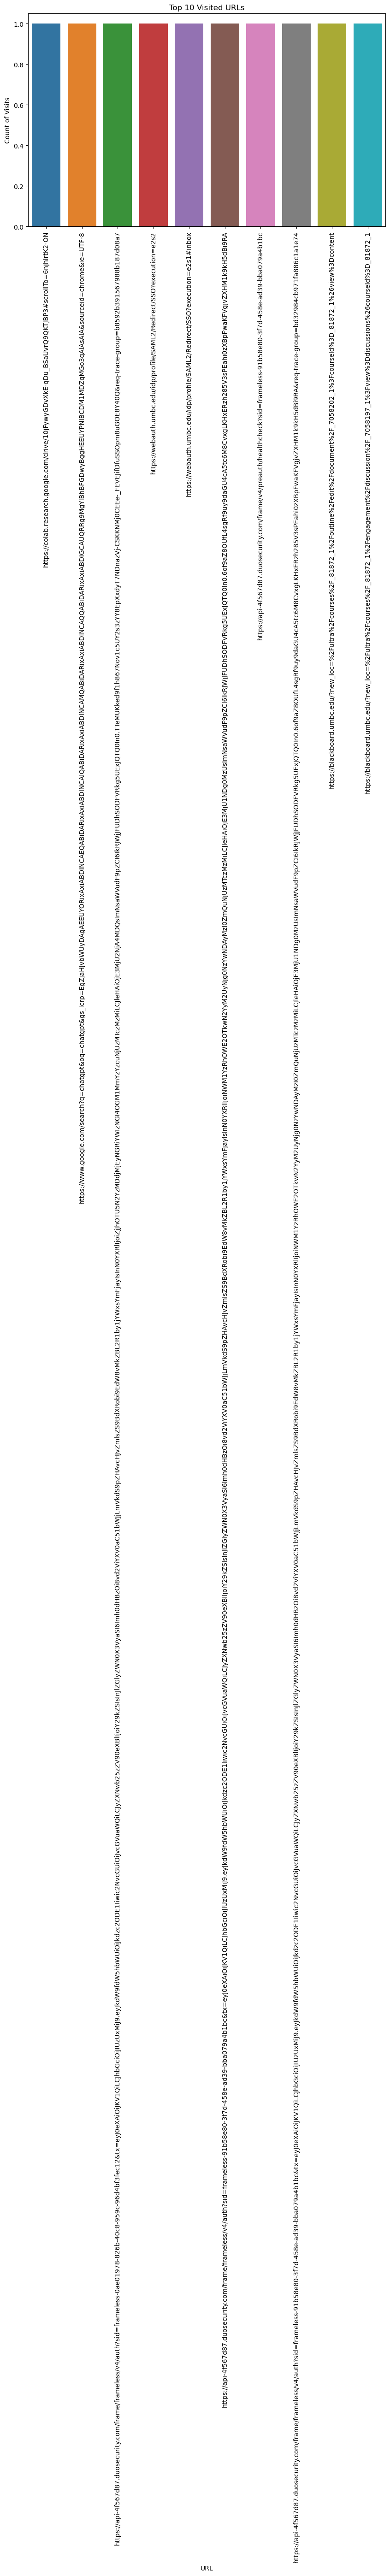

In [48]:
# Count occurrences for URLs and plot the top 10
url_counts = data['url'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=url_counts.index, y=url_counts.values)
plt.xticks(rotation=90)
plt.title('Top 10 Visited URLs')
plt.xlabel('URL')
plt.ylabel('Count of Visits')
plt.show()

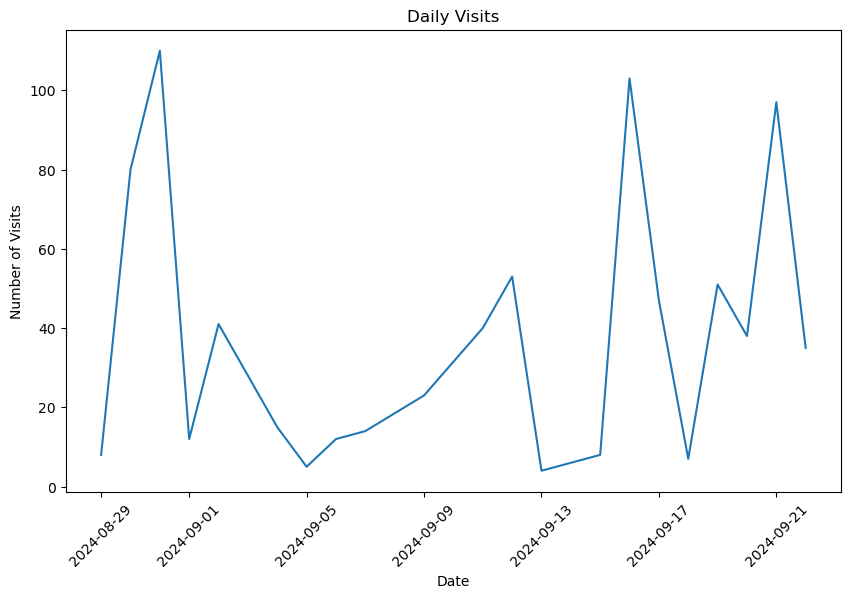

In [50]:
# Generate a daily count of visits
daily_counts = data['datetime'].dt.date.value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_counts.index, y=daily_counts.values)
plt.xticks(rotation=45)
plt.title('Daily Visits')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.show()

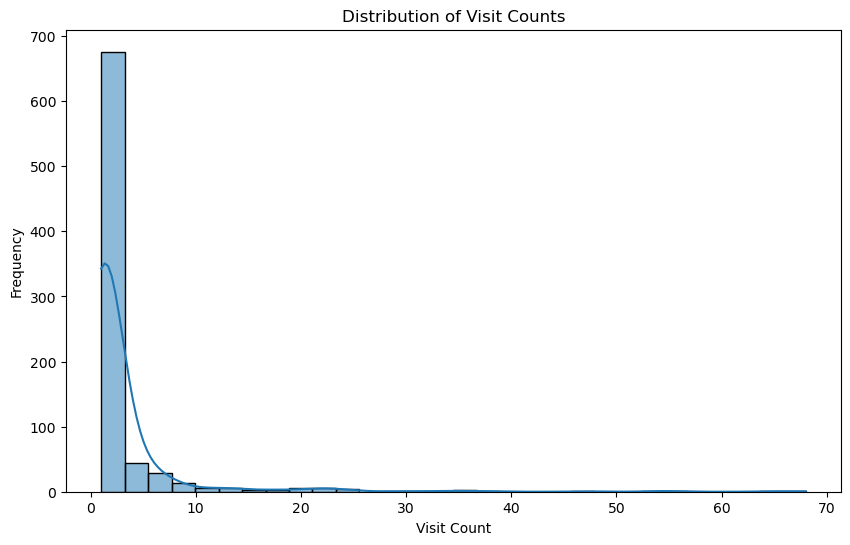

In [51]:
# Distribution of the number of visits
plt.figure(figsize=(10, 6))
sns.histplot(data['visitCount'], bins=30, kde=True)
plt.title('Distribution of Visit Counts')
plt.xlabel('Visit Count')
plt.ylabel('Frequency')
plt.show()

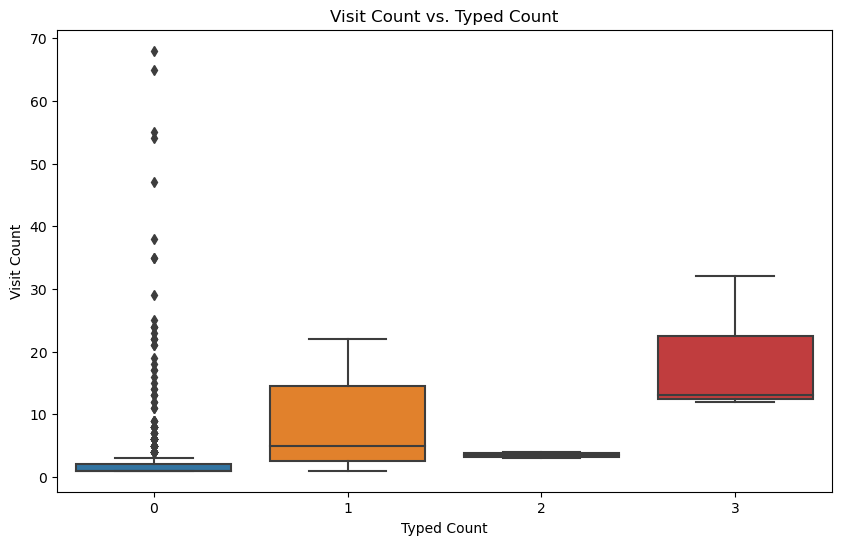

In [52]:
# Bar plot showing the relationship between visitCount and typedCount
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='typedCount', y='visitCount')
plt.title('Visit Count vs. Typed Count')
plt.xlabel('Typed Count')
plt.ylabel('Visit Count')
plt.show()

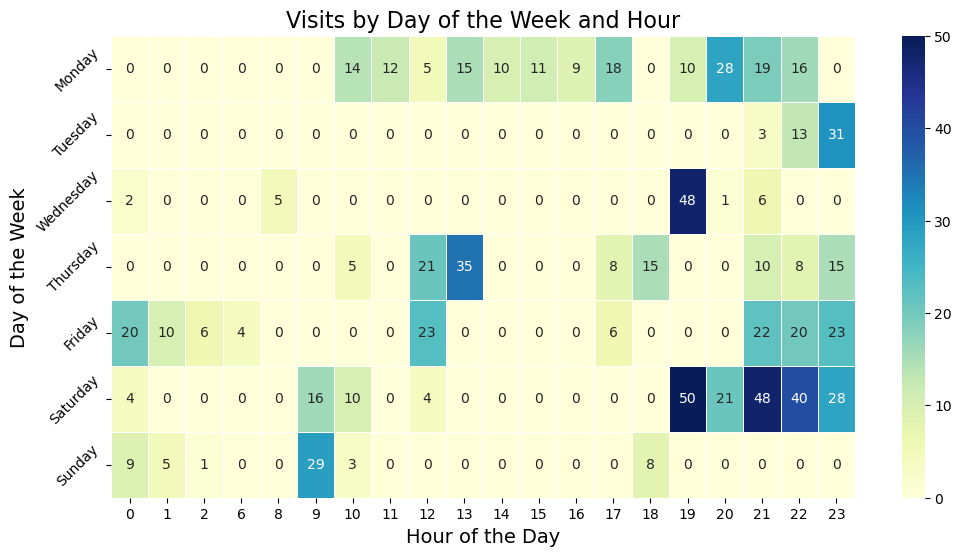

In [53]:
# Set the datetime column as the index for easier time-series analysis
data.set_index('datetime', inplace=True)

# Extract day of the week and hour
data['day_of_week'] = data.index.day_name()
data['hour'] = data.index.hour

# A pivot table for the heatmap (Count of occurrences)
pivot_table = data.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)

# Reordered rows to start the week from Monday
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(ordered_days)

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('Visits by Day of the Week and Hour', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Day of the Week', fontsize=14)
plt.xticks(rotation=0)  # x-axis labels are horizontal
plt.yticks(rotation=45)  # y-axis labels are readable
plt.show()

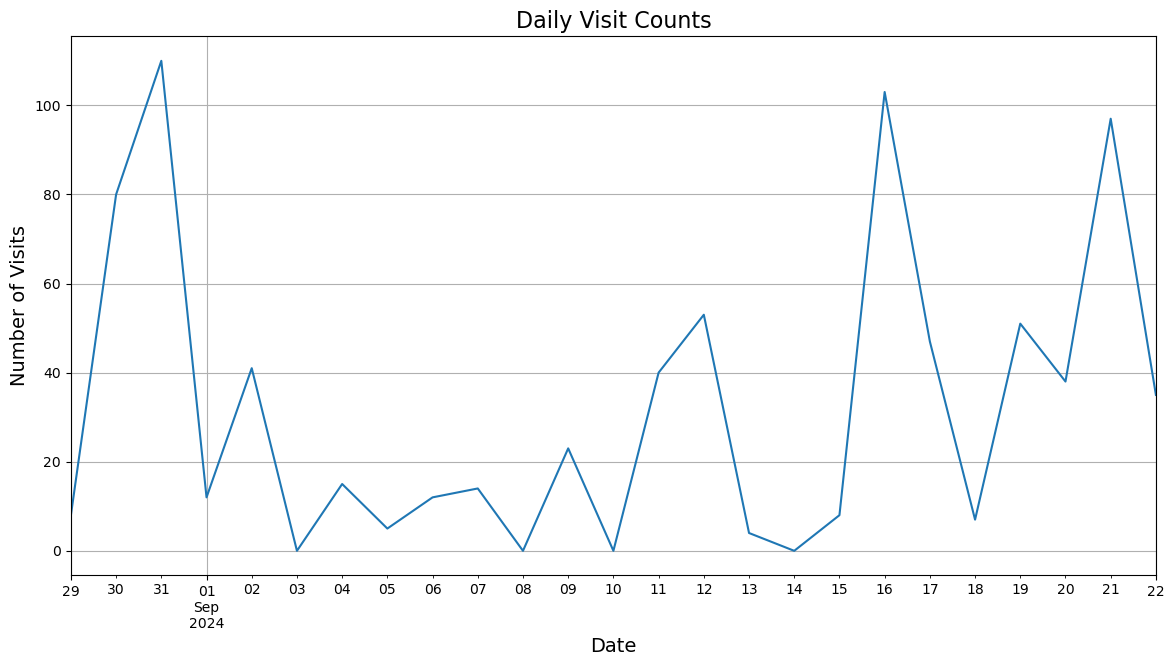

In [54]:
# Time Series Plot
plt.figure(figsize=(14, 7))
data['id'].resample('D').count().plot()
plt.title('Daily Visit Counts', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Visits', fontsize=14)
plt.grid()
plt.show()

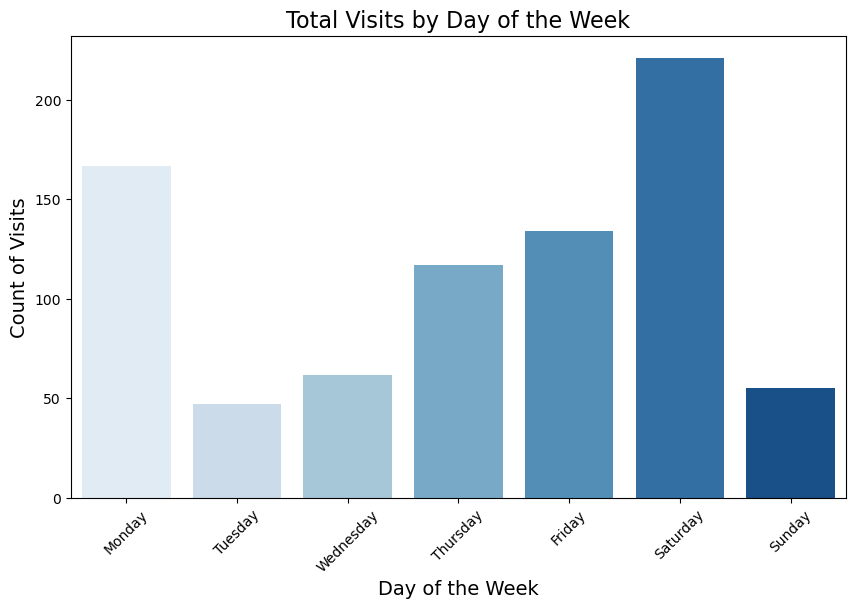

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='Blues')
plt.title('Total Visits by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Count of Visits', fontsize=14)
plt.xticks(rotation=45)
plt.show()

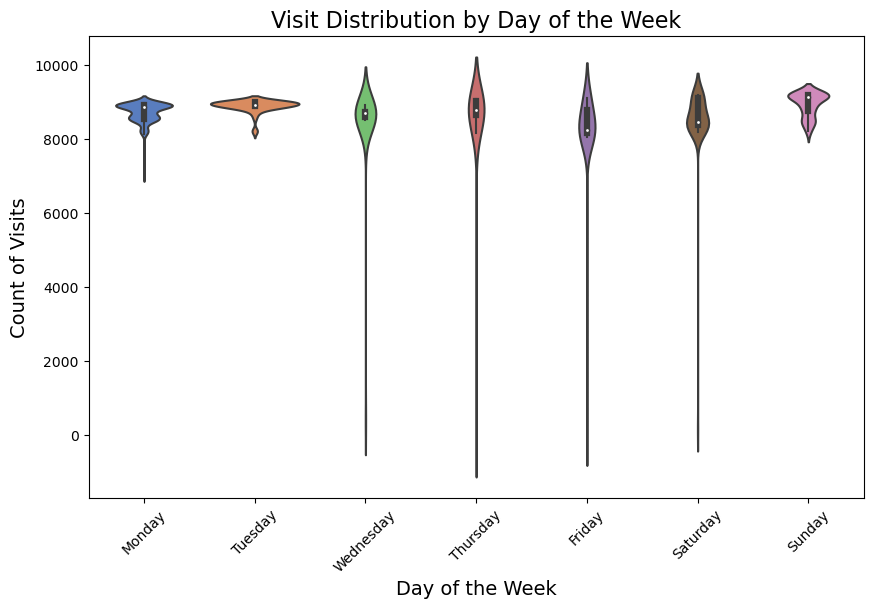

In [56]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='day_of_week', y='id', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='muted')
plt.title('Visit Distribution by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Count of Visits', fontsize=14)
plt.xticks(rotation=45)
plt.show()

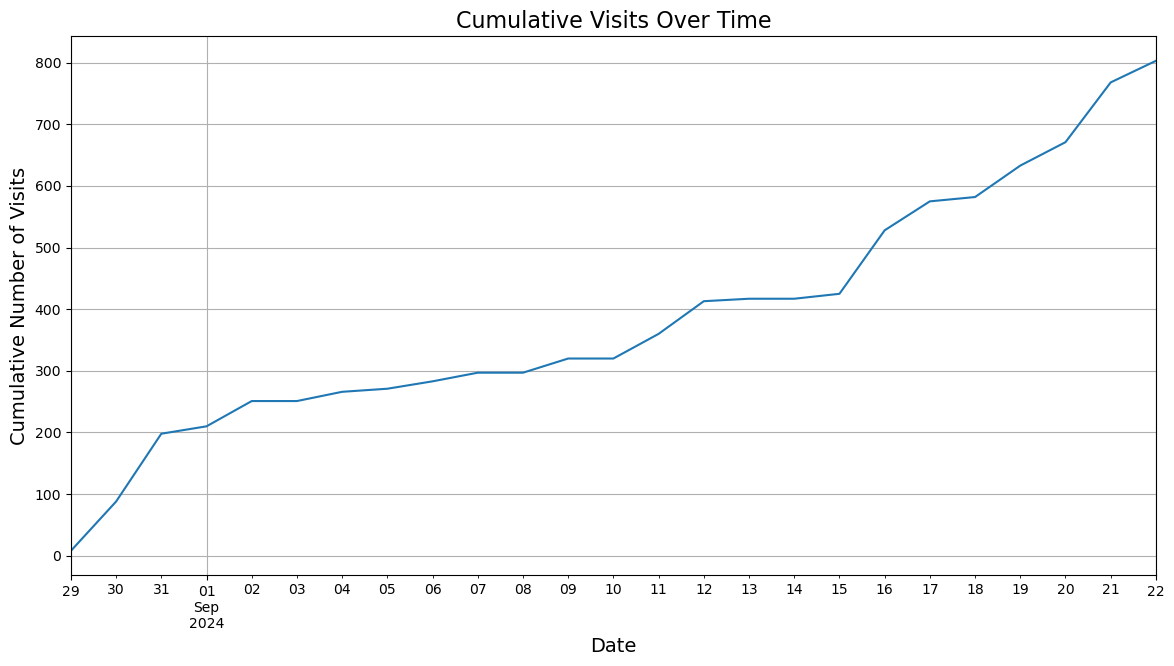

In [58]:
cumulative_visits = data['id'].resample('D').count().cumsum()

plt.figure(figsize=(14, 7))
cumulative_visits.plot()
plt.title('Cumulative Visits Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Number of Visits', fontsize=14)
plt.grid()
plt.show()

C:\Users\PHIL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


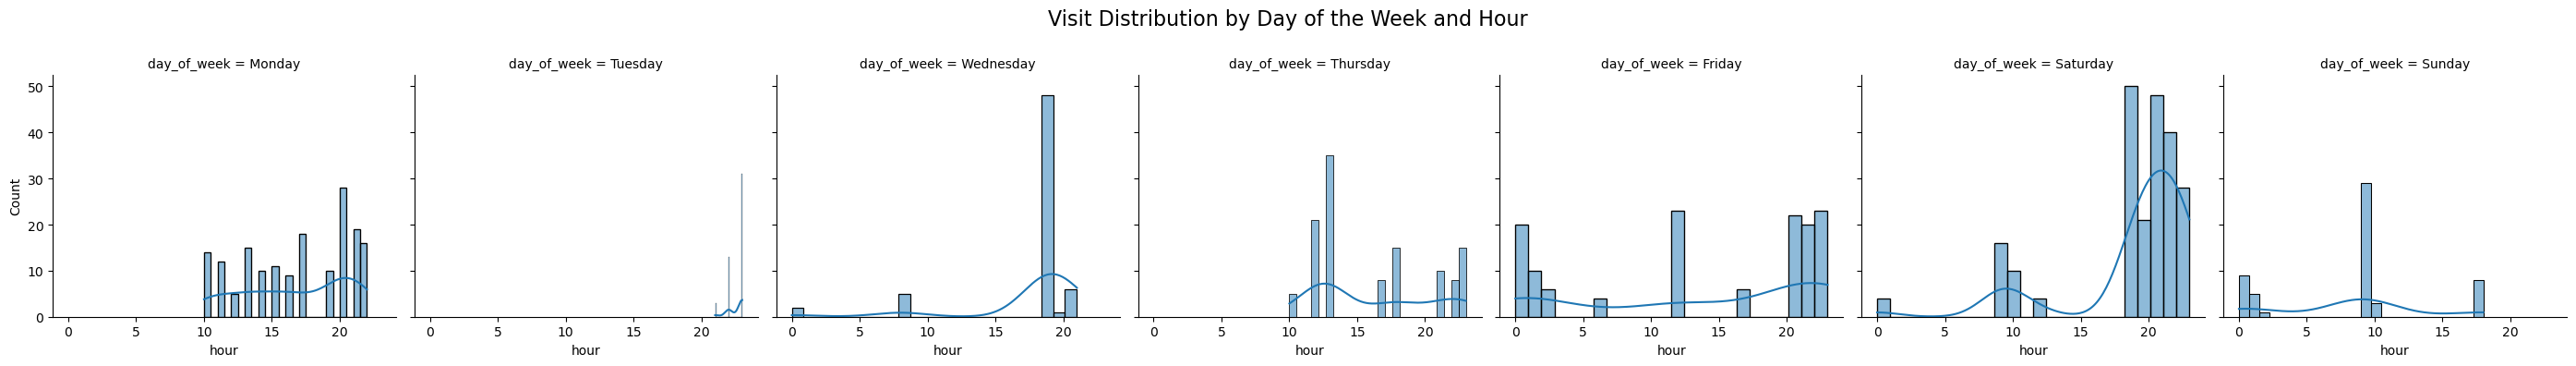

In [59]:
#FacetGrid of Visits by Day and Hour
#This visualization splits the data into multiple subplots to show trends across days.

g = sns.FacetGrid(data, col='day_of_week', col_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                  height=4)
g.map(sns.histplot, 'hour', bins=24, kde=True)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Visit Distribution by Day of the Week and Hour', fontsize=16)
plt.show()

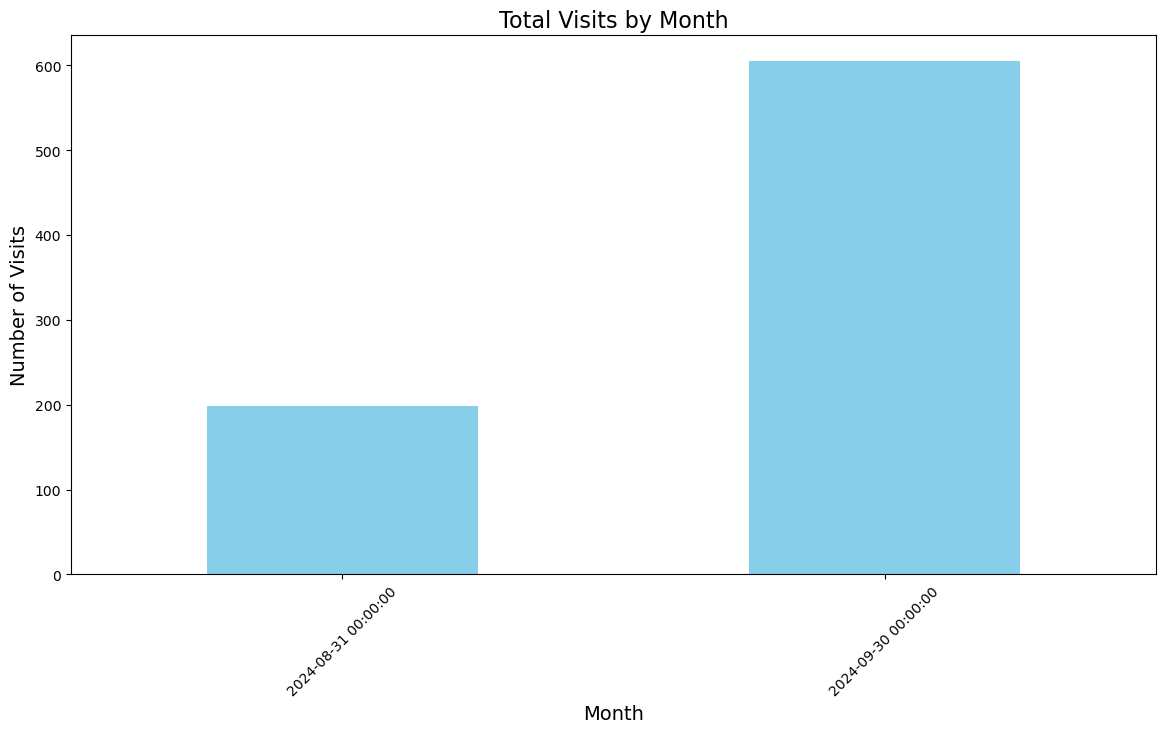

In [60]:
# Create a new column for month
data['month'] = data.index.month_name()

# Count the number of visits per month
monthly_visits = data['id'].resample('M').count()

plt.figure(figsize=(14, 7))
monthly_visits.plot(kind='bar', color='skyblue')
plt.title('Total Visits by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Visits', fontsize=14)
plt.xticks(rotation=45)
plt.show()

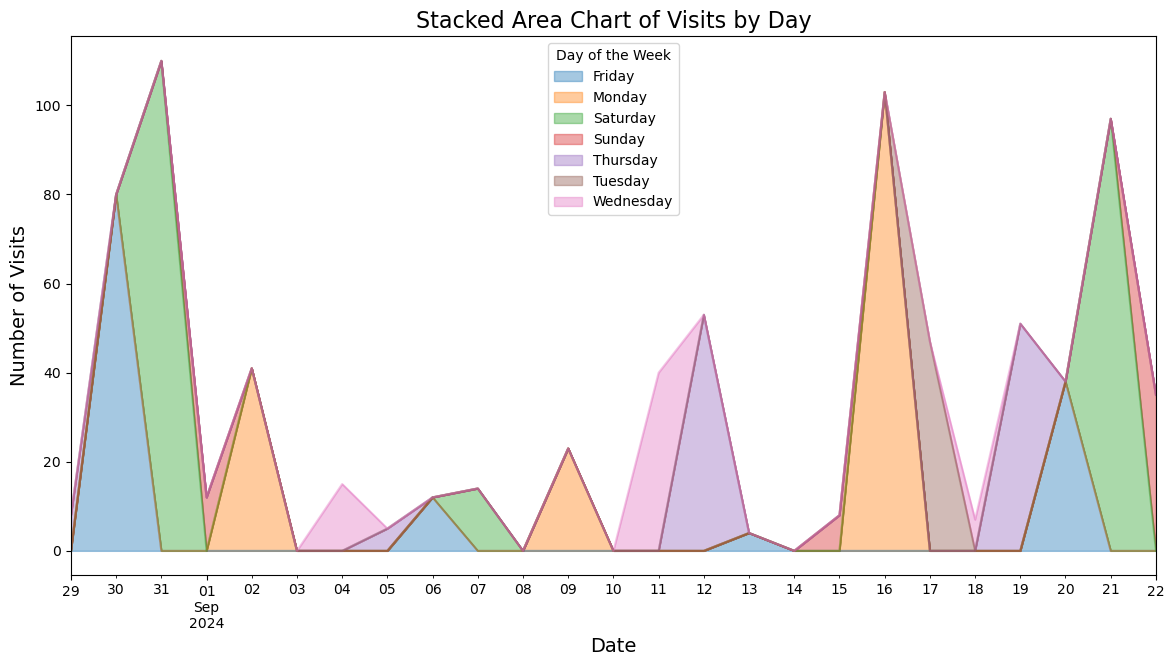

In [67]:
#Stacked Area Chart for Visits By Day
daily_counts = data.resample('D')['id'].count().to_frame().reset_index()
daily_counts['day_of_week'] = daily_counts['datetime'].dt.day_name()

daily_pivot = daily_counts.pivot_table(index='datetime', columns='day_of_week', values='id', fill_value=0)
daily_pivot.plot(kind='area', stacked=True, figsize=(14,7), alpha=0.4)
plt.title('Stacked Area Chart of Visits by Day', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Visits', fontsize=14)
plt.legend(title='Day of the Week')
plt.show()